## Лабораторная работа №3 (часть 1) — Логистическая регрессия

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Загрузка и первичный анализ датасета Iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Названия сортов:", iris.target_names)
print("Метки классов:", iris.target[:10])
df.head()

Названия сортов: ['setosa' 'versicolor' 'virginica']
Метки классов: [0 0 0 0 0 0 0 0 0 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###  1. Визуализация зависимостей для трёх сортов

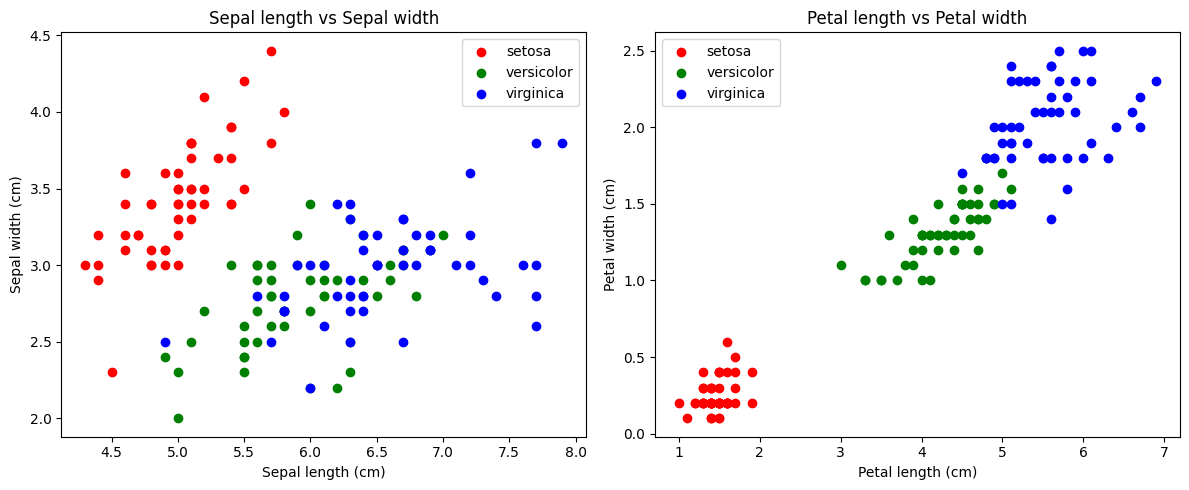

In [3]:
colors = ['red', 'green', 'blue']
targets = iris.target_names

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(df[df.target == i]['sepal length (cm)'],
                df[df.target == i]['sepal width (cm)'],
                label=targets[i], color=colors[i])
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Sepal length vs Sepal width")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(df[df.target == i]['petal length (cm)'],
                df[df.target == i]['petal width (cm)'],
                label=targets[i], color=colors[i])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Petal length vs Petal width")
plt.legend()

plt.tight_layout()
plt.show()

###  2. Визуализация через seaborn

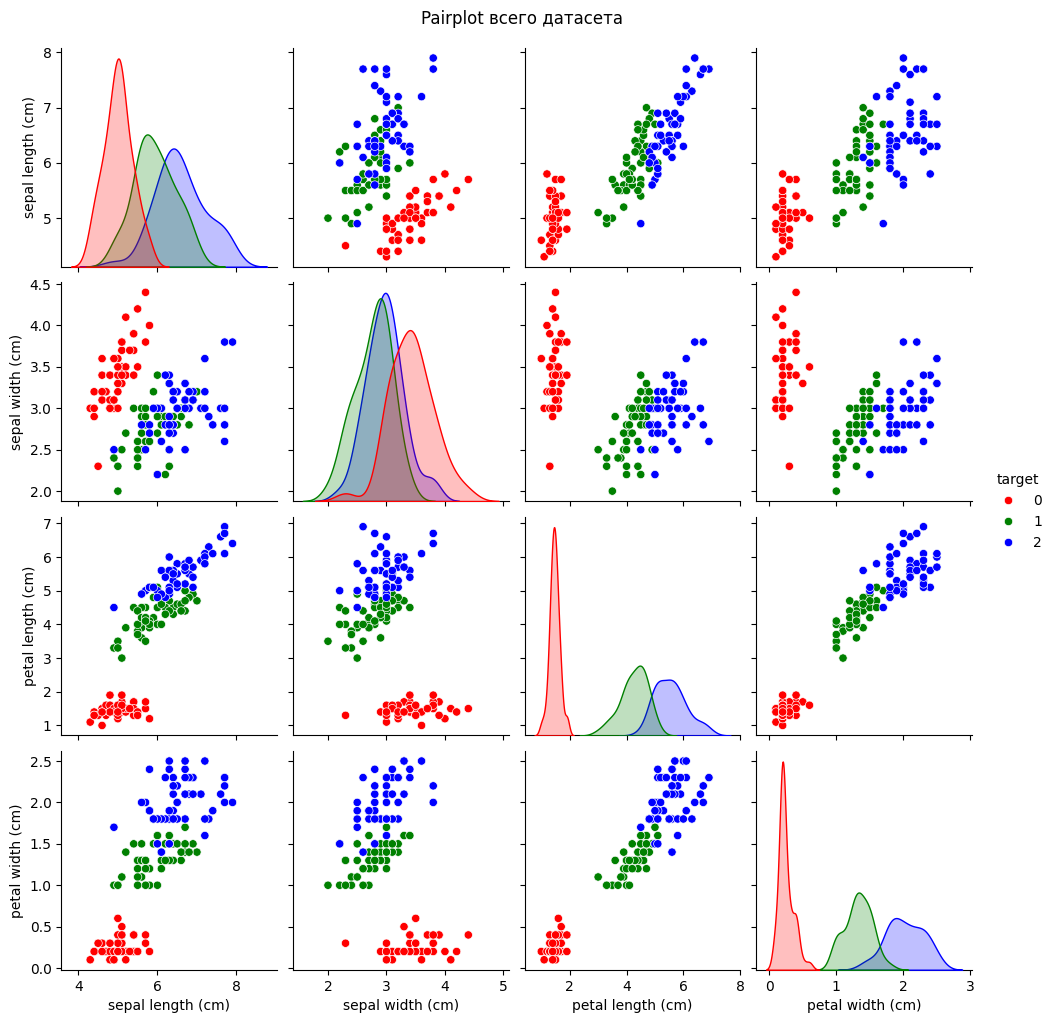

In [9]:
sns.pairplot(df, hue="target", palette=colors)
plt.suptitle("Pairplot всего датасета", y=1.02)
plt.show()

### 3. Создание двух бинарных датасетов

In [10]:
df1 = df[df['target'].isin([0, 1])]
df2 = df[df['target'].isin([1, 2])]

##  4–8. Обучение и оценка модели логистической регрессии для двух выборок

###  Dataset 1: Setosa vs Versicolor

In [11]:
X1 = df1.drop(columns='target')
y1 = df1['target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

clf1 = LogisticRegression(random_state=0)
clf1.fit(X1_train, y1_train)

y1_pred = clf1.predict(X1_test)
print("Accuracy (Setosa vs Versicolor):", accuracy_score(y1_test, y1_pred))

Accuracy (Setosa vs Versicolor): 1.0


###  Dataset 2: Versicolor vs Virginica

In [12]:
X2 = df2.drop(columns='target')
y2 = df2['target']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

clf2 = LogisticRegression(random_state=0)
clf2.fit(X2_train, y2_train)

y2_pred = clf2.predict(X2_test)
print("Accuracy (Versicolor vs Virginica):", accuracy_score(y2_test, y2_pred))

Accuracy (Versicolor vs Virginica): 0.9333333333333333


## 🔹 9. Генерация случайного бинарного датасета и классификация

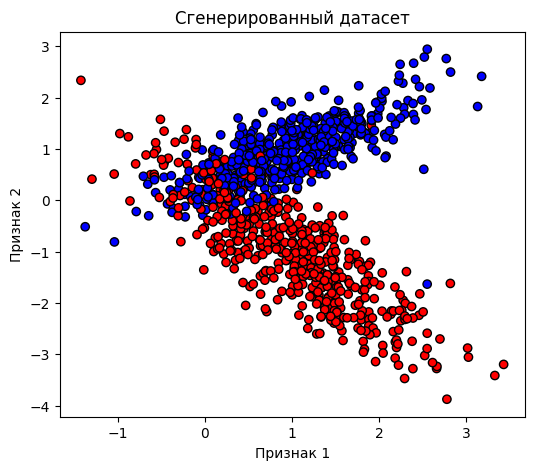

Accuracy (синтетический датасет): 0.9366666666666666


In [13]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, random_state=1,
                           n_clusters_per_class=1)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Сгенерированный датасет")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

# Обучение модели на синтетических данных
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X, y, test_size=0.3, random_state=42)

clf_syn = LogisticRegression()
clf_syn.fit(X_train_syn, y_train_syn)

y_pred_syn = clf_syn.predict(X_test_syn)
print("Accuracy (синтетический датасет):", accuracy_score(y_test_syn, y_pred_syn))